<a href="https://colab.research.google.com/github/LCaravaggio/ClaseFelicidad_Maestria/blob/main/Felicidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar base

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_stata('/content/drive/MyDrive/Latinobarometro_2020_Esp_Stata_v1_0.dta')  

In [6]:
df.head(2)

,numinves,idenpa,numentre,reg,ciudad,tamciud,comdist,edad,sexo,codigo,...,s28_a,s28_b,s29,s30,reeduc_1,reeduc_2,reedad,perpart,fampart,wt
0,2020,Argentina,3200001,AR: Metropolitana,AR: Buenos Aires-Presidente Peron,No preguntada,2,63,Mujer,No preguntada,...,Asalariado en emp. privada,No aplicable,Profesional,No preguntada,BÃ¡sica incompleta,Analfabeto,61 y mÃ¡s,No menciona partido,Perdidos,2.20
1,2020,Argentina,3200002,AR: Capital Federal,AR: Capital Federal-Ciudad de Buenos Aires,No preguntada,1,24,Hombre,No preguntada,...,No aplicable,No aplicable,No aplicable,No preguntada,Superior Incompleta,BÃ¡sica completa,16-25,Gobierno,Partidos Social DemÃ³cratas,0.62


In [10]:
df.shape

(20204, 408)

In [11]:
itr = pd.read_stata('/content/drive/MyDrive/Latinobarometro_2020_Esp_Stata_v1_0.dta', iterator=True)

In [12]:
itr.variable_labels()

{'numinves': 'NUMINVES NÃºmero de InvestigaciÃ³n',
 'idenpa': 'IDENPA IdentificaciÃ³n del PaÃ\xads',
 'numentre': 'NUMENTRE NÃºmero de Entrevista',
 'reg': 'REG RegiÃ³n/ Provincia',
 'ciudad': 'CIUDAD Ciudad',
 'tamciud': 'TAMCIUD TamaÃ±o de hÃ¡bitat',
 'comdist': 'COMDIST DenominaciÃ³n muestral: Sector/Municipio/Comuna/Barrio/Distrito',
 'edad': 'EDAD Edad',
 'sexo': 'SEXO Sexo',
 'codigo': 'CODIGO CÃ³digo de encuestador',
 'diareal': 'DIAREAL DÃ\xada de realizaciÃ³n',
 'mesreal': 'MESREAL Mes de realizaciÃ³n',
 'ini': 'INI Hora de inicio entrevista (HHMM)',
 'fin': 'FIN Hora de tÃ©rmino (HHMM)',
 'dura': 'DURA DuraciÃ³n de la entrevista (minutos)',
 'totrevi': 'TOTREVI Control de Revisitas',
 'totcuot': 'TOTCUOT Control de Cuotas',
 'totrech': 'TOTRECH NÃºmero total de rechazos',
 'totperd': 'TOTPERD NÃºmero total de pÃ©rdidas',
 'numcasa': 'NUMCASA NÃºmero de hogares distintos contactados para conseguir esta entrevista',
 'codsuper': 'CODSUPER CÃ³digo Supervisor',
 'supervvi': 'SUPE

In [13]:
df['p1st'].value_counts()

Muy satisfecho          7690
Bastante satisfecho     7531
No muy satisfecho       3765
Para nada satisfecho     965
No contesta              253
Name: p1st, dtype: int64

In [14]:
df['p1st'].unique()

['Muy satisfecho', 'Para nada satisfecho', 'Bastante satisfecho', 'No muy satisfecho', 'No contesta']
Categories (5, object): ['No contesta' < 'Muy satisfecho' < 'Bastante satisfecho' <
                         'No muy satisfecho' < 'Para nada satisfecho']

In [16]:
df['p1st_values']=df['p1st'].replace(df['p1st'].unique(), [10, 3, 7, 5, np.nan], inplace=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [17]:
df.groupby('idenpa')[['p1st_values']].mean()

,p1st_values
idenpa,
Argentina,7.001691
Bolivia,6.927119
Brasil,6.696488
Chile,6.704013
Colombia,8.289056
Costa Rica,8.142424
Rep. Dominicana,8.236977
Ecuador,7.620168
El Salvador,8.119388


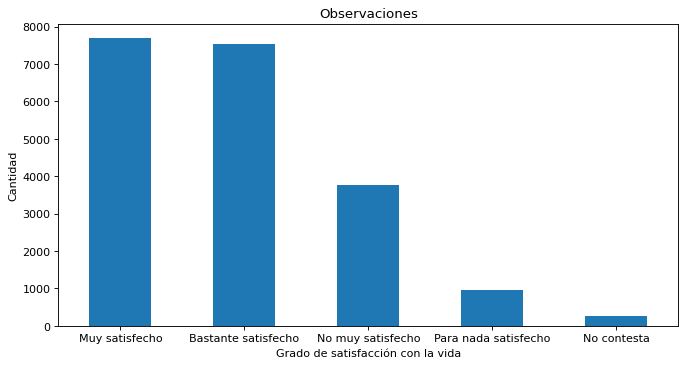

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,5), dpi=80)

df['p1st'].value_counts().plot(kind="bar")
plt.title("Observaciones")
plt.xlabel("Grado de satisfacción con la vida")
plt.xticks(rotation=0)
plt.ylabel("Cantidad")
plt.show()

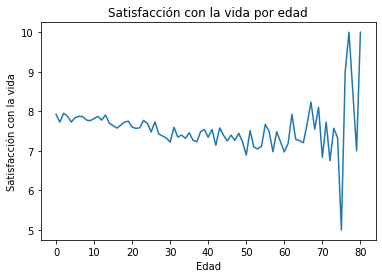

In [ ]:
plt.title('Satisfacción con la vida por edad')
plt.xlabel('Edad')
plt.ylabel('Satisfacción con la vida')
plt.plot(df.groupby('edad')[['p1st_values']].mean())
plt.show()

In [ ]:
df['reeduc_1'].value_counts()

Secundaria, media, tÃ©cnica completa      5677
BÃ¡sica completa                          3497
Superior completa                         2928
Secundaria, media, tÃ©cnica incompleta    2613
BÃ¡sica incompleta                        2189
Superior Incompleta                       1842
Analfabeto                                1455
Sin dato                                     3
Name: reeduc_1, dtype: int64

In [19]:
df['reeduc_1'].unique()

['BÃ¡sica incompleta', 'Superior Incompleta', 'BÃ¡sica completa', 'Superior completa', 'Secundaria, media, tÃ©cnica incompleta', 'Secundaria, media, tÃ©cnica completa', 'Analfabeto', 'Sin dato']
Categories (8, object): ['Sin dato' < 'Analfabeto' < 'BÃ¡sica incompleta' < 'BÃ¡sica completa' <
                         'Secundaria, media, tÃ©cnica incompleta' < 'Secundaria, media, tÃ©cnica completa' <
                         'Superior Incompleta' < 'Superior completa']

In [24]:
df['reeduc_1_values']=df['reeduc_1'].replace(df['reeduc_1'].unique(), [5, 15, 7, 20, 16, 18, 2, np.nan], inplace=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


# Regresión lineal

In [26]:
df=df.dropna()

In [27]:
df.shape

(19948, 410)

In [28]:
from sklearn import linear_model

X = df['reeduc_1_values'].values.reshape(-1,1)
y = df['p1st_values'].values
lr = linear_model.LinearRegression()
lr.fit(X, y)
Yest = lr.predict(X)

In [31]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ',lr.intercept_, '+ ', lr.coef_, 'x ', )
print()
print('R2 del modelo:')
print(lr.score(X, y))

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[0.01350802]
Valor de la intersección o coeficiente "b":
7.4047017929613705

La ecuación del modelo es igual a:
y =  7.4047017929613705 +  [0.01350802] x 

R2 del modelo:
0.0014557458059991646


In [32]:
import statsmodels.formula.api as smf

In [33]:
datos=pd.DataFrame(data=np.column_stack((X,y)),columns=['X','y'])

formula = 'y ~ X'

lm = smf.ols(formula=formula, data=datos).fit()
print(lm.params)

lm.rsquared

Intercept    7.404702
X            0.013508
dtype: float64


0.001455745806001163

In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     29.08
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           7.03e-08
Time:                        00:04:36   Log-Likelihood:                -43630.
No. Observations:               19948   AIC:                         8.726e+04
Df Residuals:                   19946   BIC:                         8.728e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4047      0.037    201.394      0.000       7.333       7.477
X              0.0135      0.003      5.392      0.000       0.009       0.018
==============================================================================
Omnibus:                     5433.078   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1079.067
Skew:                          -0.249   Prob(JB):                    4.82e-235
Kurtosis:                       1.975   Cond. No.                         35.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""